# R.U.Stoked as a REPORT
------
<img src="cover.png" style="float:left;width:500px;height:250px;"><br clear="all">

   
This is a tiny report out of data used for this [Machine Learning Project](https://github.com/mohsen-saki/RUStoked) of mine. Think it would be fun having a closer look and see what is going on under the hood of employees’ opinions. Just few points before diving in:

* The companies in this dataset kind of happen to be selected randomly. In fact, during data collection, I just tried some companies off the top of my head and if they had a fair amount of reviews registered, I gave it a go.
* The dataset is a small one and [SEEK](https://www.seek.com.au/companies/) functionality is not really to register employees' opinions. Having said that,  and considering the fact that most people do not feel much comfortable to publicly share opinions of their workplace; _`this dataset should not be interpreted as a comprehensive evaluation of those companies.`_

However, there are some people out there- whom I call **Data World Citizens**- that have expressed their views and I think there should be no harm in having a bit of **data fun :)**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as mplstyle
mplstyle.use('ggplot')
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
from wordcloud import WordCloud
from PIL import Image

import sys
sys.path.append("..")
from pathlib import Path

from rustoked.data_processing import(
    clean_raw_dataframe,
    get_punct_removed,
    get_clean_text
)
from report_utils import(
    get_barchart,
    get_word_cloud
)

import warnings
warnings.filterwarnings('ignore')
%reload_ext autoreload
%autoreload 2

[nltk_data] Downloading package stopwords to /home/sakima/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/sakima/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# loading data and a little bt of cleaning

data_source = Path("../data/raw_data.csv")
df = pd.read_csv(data_source)
df = clean_raw_dataframe(df.copy())
df = get_clean_text(df.copy())

company_service = ['Deloitte', 'EY', 'SEEK', 'KPMG', 'IBM', 'Suncorp', 'Bupa Wellness']
company_finance = ['Westpac Banking Corporation', 'ANZ', 'NAB', 'Commonwealth Bank of Australia']
company_retails = ['Coles Supermarkets', 'Woolworths Supermarkets', 'ALDI', 'AGL Energy']
company_telecom = ['Telstra', 'Vodafone', 'Optus']

In [3]:
df.head(1)

,job_title,recommendation,salary,date,location,career_opportunity_rating,work_life_balance_rating,work_env_rating,management_rating,benefits_rating,diversity_rating,overall_rating,company,reviews,calculated_rating,labels,cleantxt
0,Delicatessen Manager,Yes,Average,1 year ago,"New South Wales, Australia",4,1,3,3,2,4,3,Coles Supermarkets,"‘Okay, given your prepared to work long days.’...",3.0,1,okay given prepared work long day plenty hour ...


### 1. Overall Rating
----
First let’s see how employees rated their workplaces overall. Almost all of them are rated a little higher than average (3-something out of 5) but for SEEK which seems to be performing way better than the rest. I am going to ignore the fact that SEEK is actually the data owner and say **Nice Job! :)**

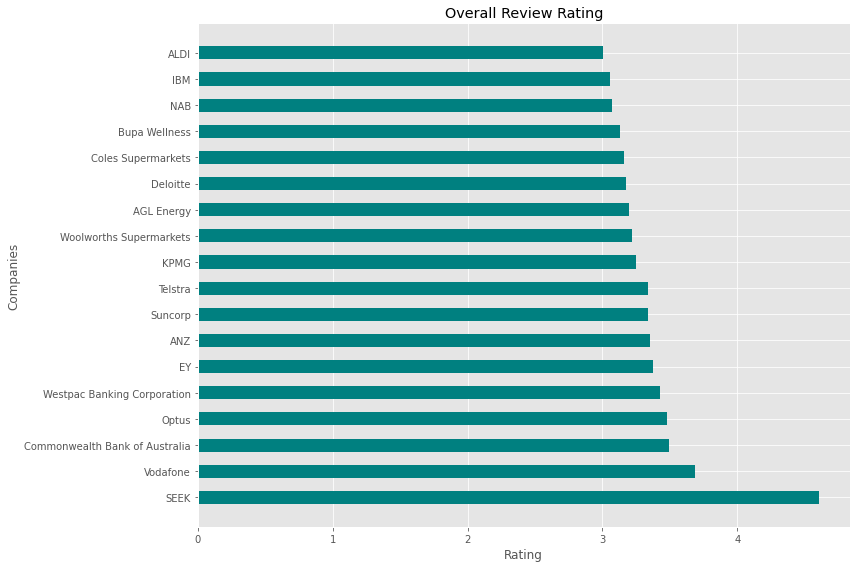

In [4]:
data = df[["company", "overall_rating"]].groupby(
    "company").mean().sort_values("overall_rating", ascending=False)

fields = data.index
values = [data.overall_rating.values]
titles= ["Overall Review Rating", "Rating", "Companies"]

get_barchart(fields=fields, values=values, titles=titles, legends=None)

### 2. If employees recommend their work experience
---
Well, the outcome is consistent with overall rating and more than `%50` of employees recommend their workplace to others.

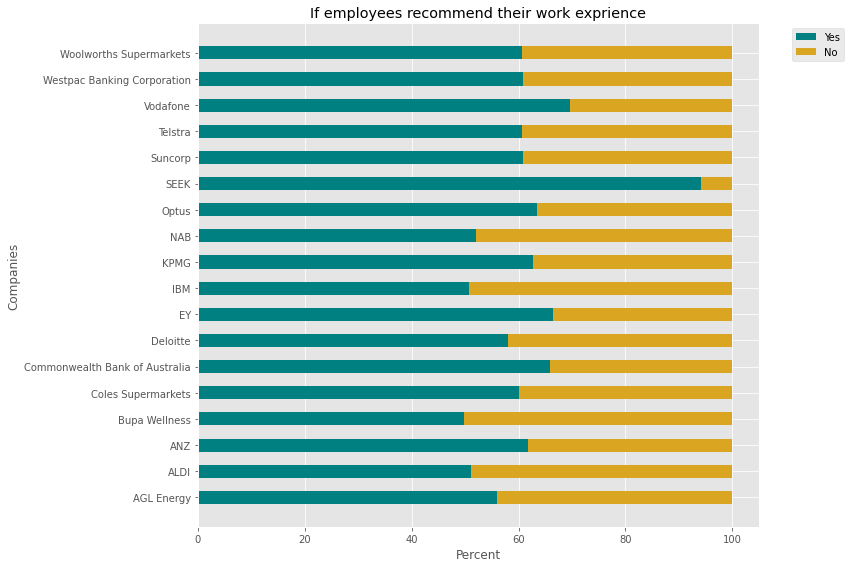

In [5]:
data = df[["company", "recommendation"]].groupby(["company", "recommendation"]
                                                ).agg({'recommendation' : 'count'}
                                                     ).groupby(level=0).apply(lambda x: 100*x/x.sum())

fields = data.index.levels[0]
values = [data.recommendation.values[1::2], data.recommendation.values[::2]]
titles = ["If employees recommend their work exprience", "Percent", "Companies"]
legends = ["Yes", "No"]


get_barchart(fields=fields, values=values, titles=titles, legends=legends)

### 3. Salary Range
----
Regarding salary range, an interesting observation is **ALDI** which majority of its employees believe their income is average or higher while it was rated lowest in overall performance. Also **Deloitte** and **KPMG** need to do better _`to keep their internal stakeholders STOKED :)`_.

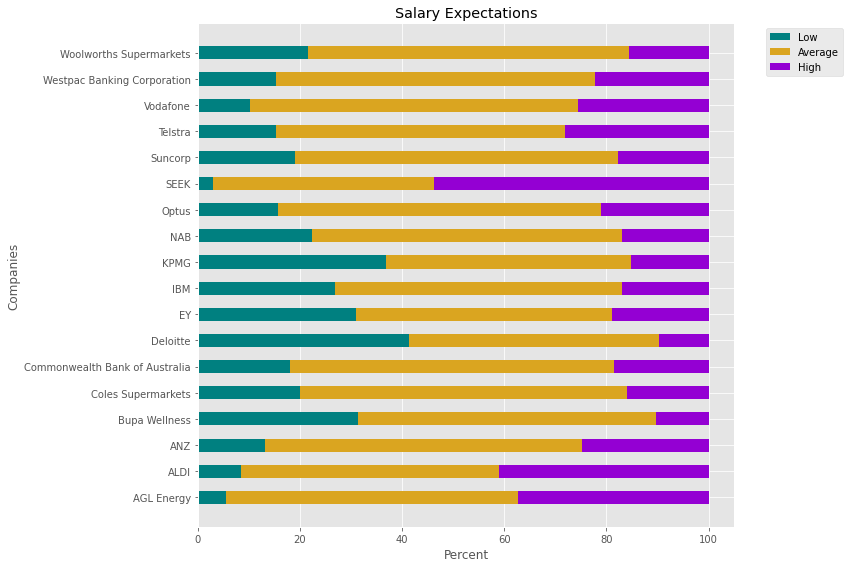

In [6]:
data = df[["company", "salary"]].groupby(["company", "salary"]
                                 ).agg({"salary" : "count"}
                                      ).groupby(level=0).apply(lambda x: 100*x / x.sum())

fields = data.index.levels[0]
values = [data.salary.values[2::3], data.salary.values[::3], data.salary.values[1::3]]
titels = ["Salary Expectations", "Percent", "Companies"]
legends = ["Low", "Average", "High"]

get_barchart(fields=fields, values=values, titles=titels, legends=legends)

### 4. What **`Stoked`** employees talk about
---
Now let’s see what stoked employees talk about. Well some words like `customer`, `people`, `life-work-balance`, `staff`, `manager`, `challenge`, experience, et cetera stand out. I suppose that means what really keeps people engaged is having a nice workplace environment and being working with nice team members.

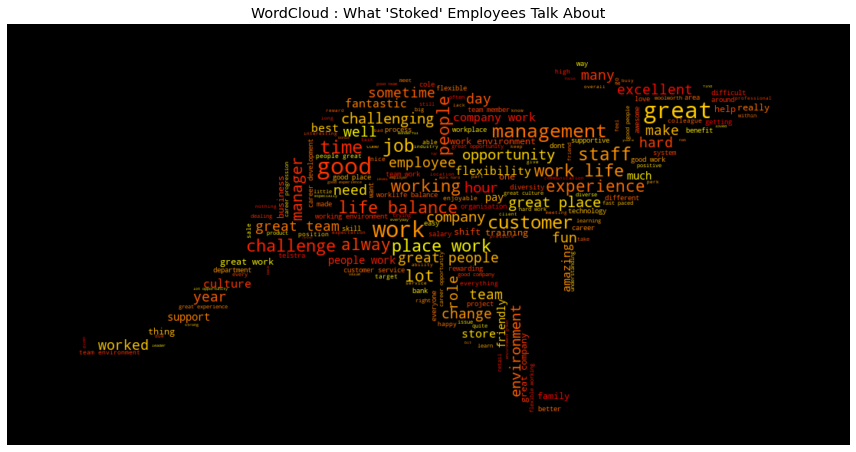

In [7]:
text_data = " ".join(review for review in df[df.labels == 2].cleantxt)
mask_path = Path("kangaroo_mask.jpg")
title = "WordCloud : What 'Stoked' Employees Talk About"

get_word_cloud(text=text_data, title=title, mask_path=mask_path)

### 5. what **`Disstaisfied`** employees talk about
---
Look at that big `management` :). If keep looking, will see also `manager` and `poor management` are sticking out. Though as a matter of fact management-staff relationship is really the most controversial one in every workplace, I think this should be viewed a bit cautiously. I believe no matter what the context is, human are very talented at belaming **others** for their situation.

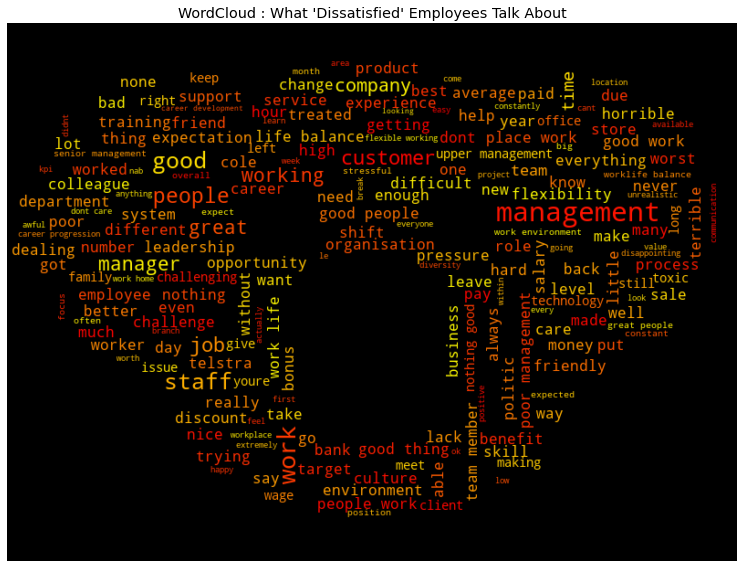

In [8]:
text_data = " ".join(review for review in df[df.labels == 0].cleantxt)
mask_path = Path("koala_mask.jpg")
title = "WordCloud : What 'Dissatisfied' Employees Talk About"

get_word_cloud(text=text_data, title=title, mask_path=mask_path)

### 6. Diversity Rating

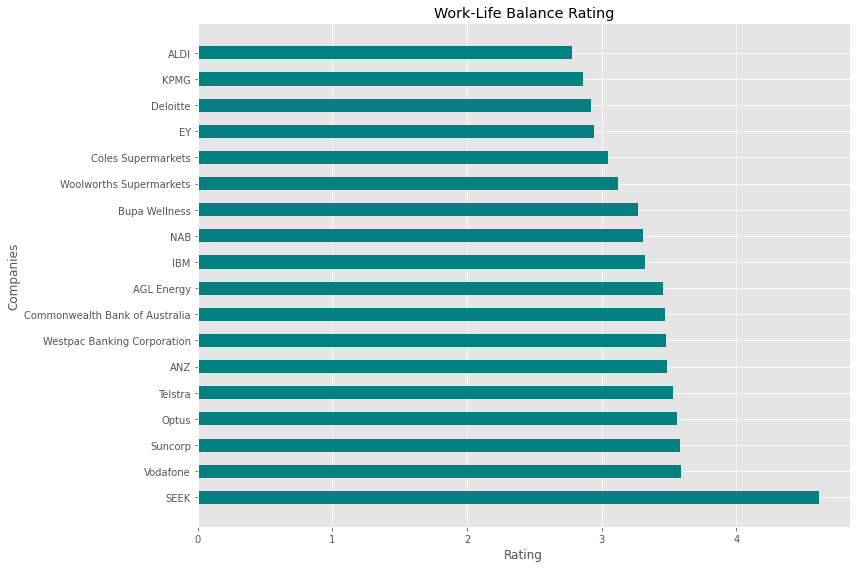

In [9]:
data = df[["company", "work_life_balance_rating"]].groupby(
    "company").mean().sort_values("work_life_balance_rating", ascending=False)

fields = data.index
values = [data.work_life_balance_rating.values]
titles= ["Work-Life Balance Rating", "Rating", "Companies"]

get_barchart(fields=fields, values=values, titles=titles, legends=None)

### 7. Management Rating
---
Well, as expected, `management` is rated slightly lower than the overall rating. However, I am about to consider **SEEK** as an `anomaly` :)

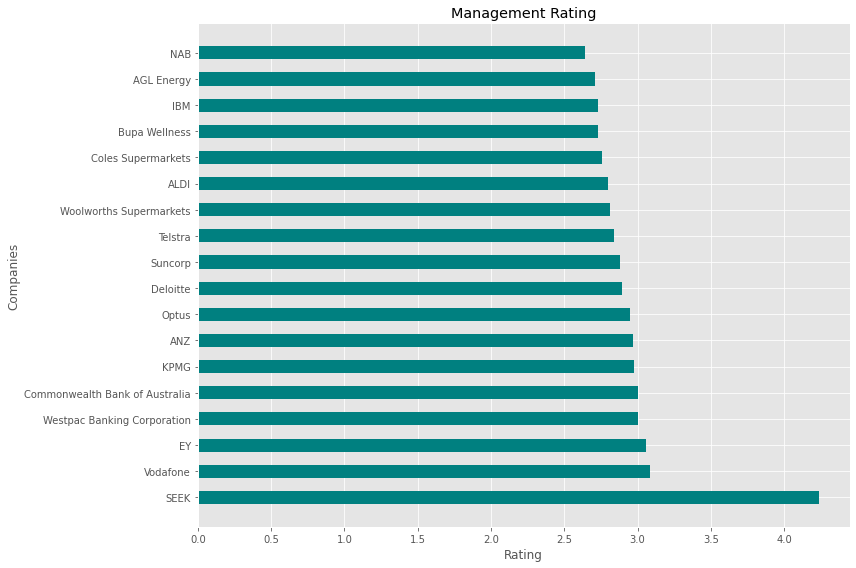

In [10]:
data = df[["company", "management_rating"]].groupby(
    "company").mean().sort_values("management_rating", ascending=False)

fields = data.index
values = [data.management_rating.values]
titles= ["Management Rating", "Rating", "Companies"]

get_barchart(fields=fields, values=values, titles=titles, legends=None)

### 8. Employee Role/Position
---
As the last piece, let’s see what are the `top 15 positions` that took their time to share their views.

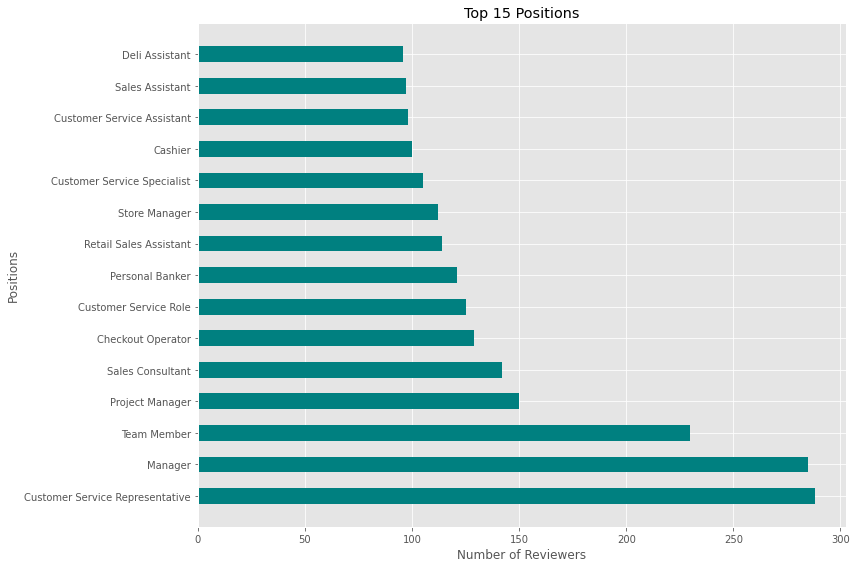

In [11]:
data = df.job_title.value_counts()[:15]

fields = data.index
values = [data.values]
titles= ["Top 15 Positions", "Number of Reviewers", "Positions"]

get_barchart(fields=fields, values=values, titles=titles, legends=None)